In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pygtc
import emcee
    
import sys 
sys.path.insert(0, '../src/')
import jsm_mcmc

import warnings; warnings.simplefilter('ignore')

### simple model for the data

In [3]:
truths_S = [10.5, 1.9, 0.2, 0, 0, 0] # [10.5, 1.9, 0.2, -0.05, 0.01, 1.2]

plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

ndim_short = 3

Nstack = 1000

In [4]:
reader = emcee.backends.HDFBackend("../../mcmc/model_runs/simple_fid/model_B/chain.h5") 
samples = reader.get_chain()

In [5]:
samples.shape

(4000, 100, 6)

In [6]:
ms_A = jsm_mcmc.single_chain("../../mcmc/model_runs/simple_fid/model_A/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_B = jsm_mcmc.single_chain("../../mcmc/model_runs/simple_fid/model_B/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_C = jsm_mcmc.single_chain("../../mcmc/model_runs/simple_fid/model_C/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_D = jsm_mcmc.single_chain("../../mcmc/model_runs/simple_fid/model_D/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

In [7]:
mlabels = ["model_A", "model_B", "model_C", "model_D"]

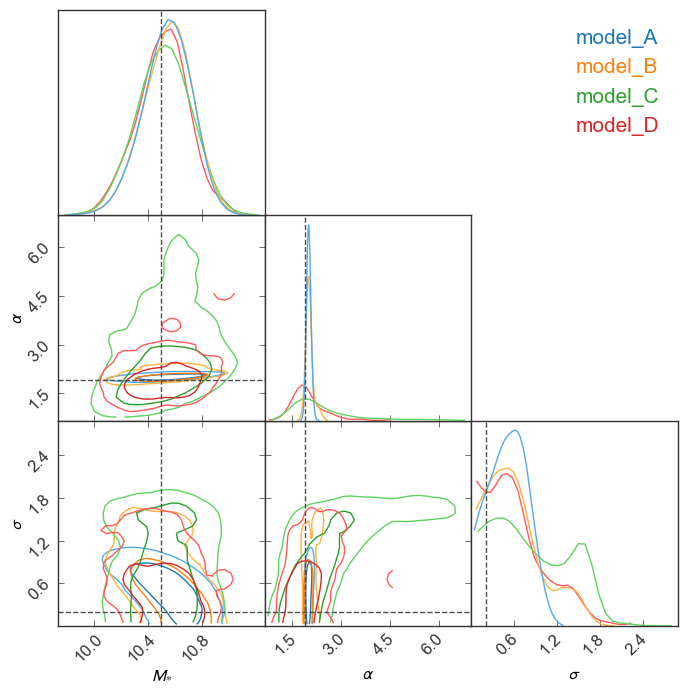

In [8]:
analysis = jsm_mcmc.multi_chain(np.array([ms_A.end, ms_B.end, ms_C.end, ms_D.end]), 3, truths_S, priors, plabels, mlabels)

analysis.trim()

analysis.plot_posteriors()

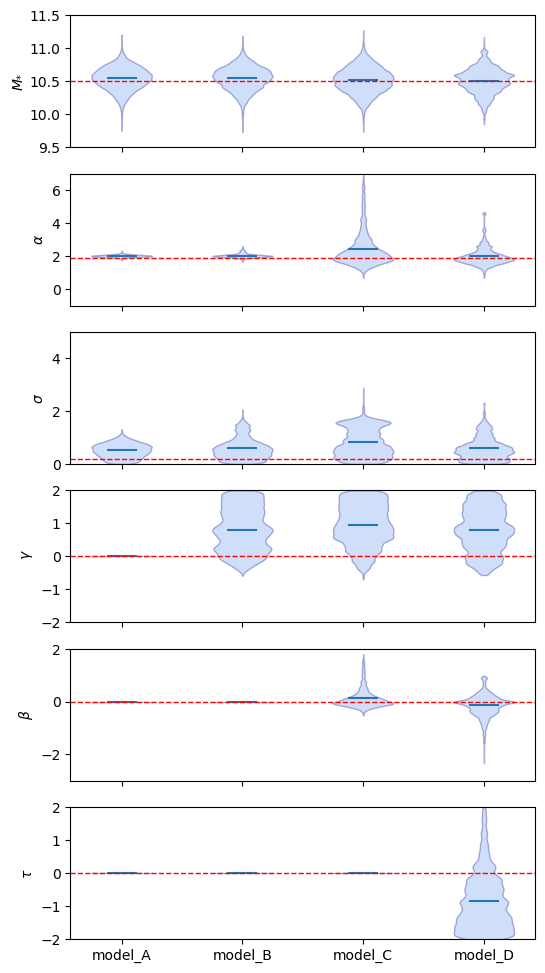

In [9]:
analysis.violin(6)